<img src="images/GMIT logo.jpeg" width="350" align="center">

# Machine Learning & Statistics Project 2019

<b>Name:</b> Peter McGowan<br>
<b>ID:</b> G00190832

## Introduction
This Jupyter notebook contains an investigation of the Boston House Prices dataset for the "Machine-Learning and Statistics" Module on the GMIT HDip in Data Analytics.

## Background

First published in 1978, the Boston House Prices dataset (Harrison and Rubinfeld, 1978) is widely used for the purpose of learning how to implement Machine Learning. It consists 506 samples across 14 variables, measuring a range of items such as average number of rooms per dwelling, property tax rate and most importantly from our point of view, the median house value of owner occupied dwellings.

## Starting Off
First we will import the required python libraries.

In [1]:
# Import pandas for managing data
# Import scipy.stats for statistical analysis
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In order to obtain reproducible results, particularly from neural networks in Keras, we should also fix the seed used to initialise pseudo-random number generation. NumPy allows us to do this quite easily.

In [2]:
import numpy as np
np.random.seed(2) # Set seed value

Scikit-learn conveniently provides the Boston House Prices dataset - we will now load it.

In [3]:
# Load the boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

We can now output the keys (GeeksforGeeks, 2019) of the dataset:

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

This consists of 5 elements:
* data: The contents of the dataset excluding the target
* target: The contents of the target (i.e. MEDV) column
* feature_names: The column headers for the data columns
* DESCR: The characteristics of the dataset, formatted
* filename: The filepath to where the dataset is installed

The pandas library includes a versatile "DataFrame" object - an indexed array that helps with managing multi-dimensional data. We will store the dataset in a dataframe, giving it the correct column headers. Pandas will automatically add an index column to this.

In [5]:
# Create a dataframe from the boston house prices dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)

## Describe

### Checks & Descriptive Statistics

We'll have a look at the head and tail of the data first of all to check for any obvious issues. df.head() will output the first 5 rows and df.tail() the last 5 rows, by default. This should be sufficient.

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


We should check also for missing values:

In [8]:
# Append .sum() to count how many values are missing
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

All seems to be in order so far. The column headers seem fairly cryptic so far - fortunately the "DESCR" key can give us more info on this.

In [9]:
# Print to output properly formatted
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The MEDV column hasn't been included in the DataFrame so far. It is included as the "target" column in the dataset from scikit-learn as this is normally the target value for machine learning. We can check that it contains the correct number of rows (506) as follows:

In [10]:
boston.target.shape

(506,)

This matches the output of the DESCR command so it should be ok.
Now we need to add it as a column to the DataFrame to make our lives a bit easier later on.

In [11]:
# Explicitly declaring a new column name adds it to the dataframe
df['MEDV'] = boston.target

Now we should output the summary statistics of the DataFrame to see how it looks:

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data seems to have imported correctly and we now have it in a format that we can work with.

### Visualisations
Now we can start creating plots.
Firstly, the distribution of the Median House Value:

Text(0.5, 1.0, 'Distribution of Median House Value')

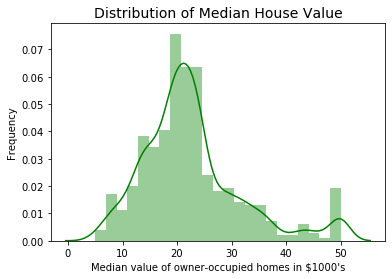

In [13]:
sns.distplot(df['MEDV'], color='g')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value', fontsize=14)

We can also look at the number of rooms per dwelling like this.

Text(0.5, 1.0, 'Distribution of Rooms')

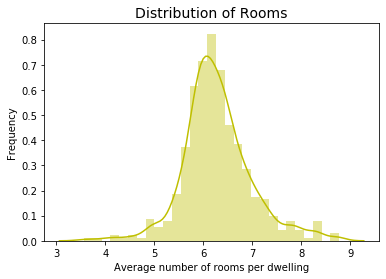

In [14]:
sns.distplot(df['RM'], color='y')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Rooms', fontsize=14)

What about the relationships between some of the statistics and the median house value?
Firstly we look at DIS:

Text(0.5, 1.0, 'MEDV vs DIS')

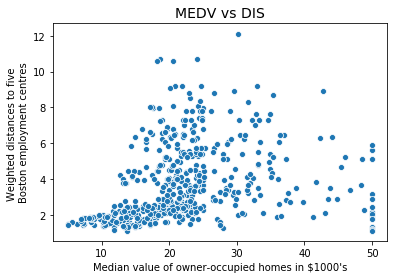

In [15]:
sns.scatterplot(x='MEDV', y='DIS', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')

plt.ylabel('Weighted distances to five \nBoston employment centres')
plt.title('MEDV vs DIS', fontsize=14)

It is difficult to tell if a definite linear relationship exists between these variables, but an unusual vertical line of values on the MEDV=50 line stand out somewhat.

We can look at RAD also:

Text(0.5, 1.0, 'MEDV vs RM')

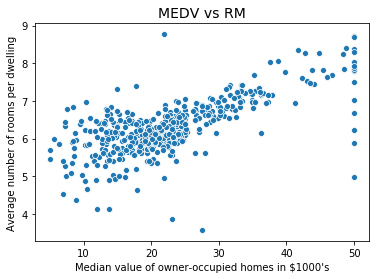

In [16]:
sns.scatterplot(x='MEDV', y='RM', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Average number of rooms per dwelling')
plt.title('MEDV vs RM', fontsize=14)

The linear relationship is much more apparent here - however the clustering of points on the MEDV=50 mark is even more apparent in this plot. This will require further investigation. 

Text(0.5, 1.0, 'MEDV vs RAD')

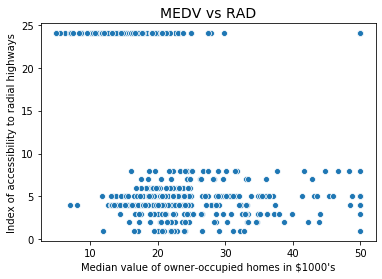

In [17]:
sns.scatterplot(x='MEDV', y='RAD', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Index of accessibility to radial highways')
plt.title('MEDV vs RAD', fontsize=14)

This is quite a bit different to the other plots - the RAD value refers to "index of accessibility to major highways" - it appears that there is a broad range of houses values that have an accessibility rating between 0 and 10, then a very large gap, with a range of houses in the low- to medium price range (with a single high price outlier) with a much higher index of around 24.

Next, we can use a box and whisker plot to look at some of the descriptive statistics of the variables.

Text(0.5, 1, 'Box and Whisker Plots for Each Variable')

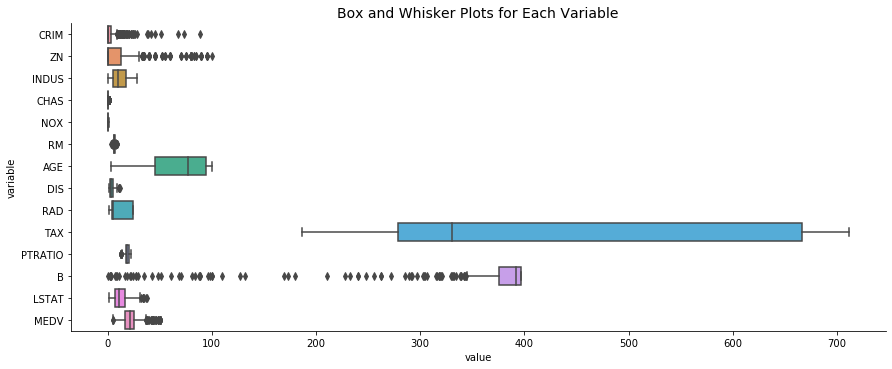

In [18]:
g = sns.catplot(x='value', y='variable', data=pd.melt(df), kind='box', height=5, aspect=2.5);
plt.title('Box and Whisker Plots for Each Variable', fontsize=14)

Clearly, they all have very distinctive characteristics - but we already have most of this information in numerical format. What this really tells us is that certain (most) variables have a good number of outliers - this should be a consideration in development of our neural network later.

## Infer

Text(0.5, 1.0, 'MEDV vs CHAS')

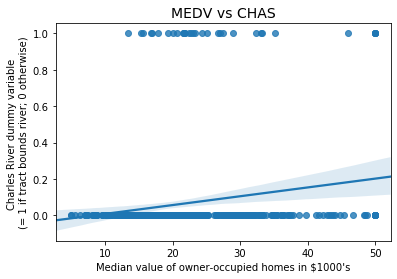

In [19]:
sns.regplot(x='MEDV', y='CHAS', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Charles River dummy variable \n(= 1 if tract bounds river; 0 otherwise)')
plt.title('MEDV vs CHAS', fontsize=14)

Text(0.5, 1, 'CHAS vs MEDV')

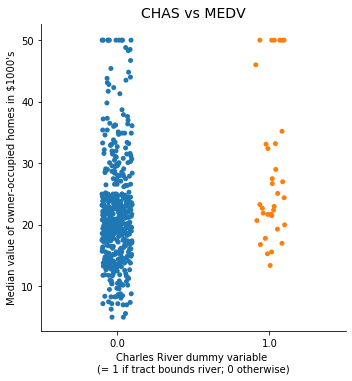

In [20]:
sns.catplot(x='CHAS', y='MEDV',  data=df)
plt.xlabel('Charles River dummy variable \n(= 1 if tract bounds river; 0 otherwise)')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.title('CHAS vs MEDV', fontsize=14)

Now lets visualise the distribution of this using histograms (Statistics.laerd.com, 2019a) with KDEs (Mathisonian.github.io, 2019) overlaid on the same plot:

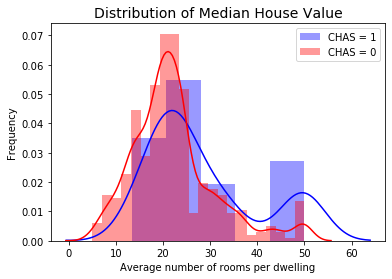

In [21]:
# Extract subsets of the dataframe for houses on the Charles River (ry) vs houses not on it (rn)
ry = df.loc[df['CHAS'] == 1]
rn = df.loc[df['CHAS'] == 0]

# Overlay a distplot for each on the same plot for comparison
sns.distplot(ry['MEDV'], color='b', label = "CHAS = 1")
sns.distplot(rn['MEDV'], color='r', label = "CHAS = 0")

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value', fontsize=14)
plt.legend()

Although the histograms of the two data sets look quite different, the shapes of the kernel density estimate plots are not dissimilar - although it can be said with reasonable confidence that the values of houses on the Charles River appear to be generally higher than those not on it. We will have to confirm this now by carrying out statistical tests using SciPy.

### T-Test

We can carry out a t-test (Statistics.laerd.com, 2019b) using scipy.stats to check if there is a significant difference in median house prices between those along the Charles River and those that are not. We need to use an independent t-test. Usage of t-test generally requires 6 assumptions (but exceptions can be made):
1. The dependent variable should be measured on a continuous scale: This is our MEDV variable, the assumption holds true
2. The independent variable should consist of two categorical, independent groups: This is the CHAS variable, the assumption holds true
3. You should have independence of observations: There is no relationship between observations in each group or between groups, the assumption holds true
4. There should be no significant outliers: This will have to be checked - it may be an issue
5. The dependent variable should be approximately normally distributed for each group of the independent variable: This will have to be checked - it may be an issue
6. There needs to be homogeneity of variances: This will have to be checked - it may be an issue

#### Assumption 4 Resolution

Unfortunately, our earlier box and whisker plot indicated that the MEDV column included a significant number of (high) outliers. We can try creating a subset of the DataFrame with only rows where the MEDV value is below a certain number.

In [22]:
# Select rows with MEDV < 36 (from trial and error)
dfSubset = df.query("MEDV < 36")
dfSubset.count()

CRIM       462
ZN         462
INDUS      462
CHAS       462
NOX        462
RM         462
AGE        462
DIS        462
RAD        462
TAX        462
PTRATIO    462
B          462
LSTAT      462
MEDV       462
dtype: int64

This leaves us with 462 rows out of the original 506, still more than 90% of the dataset to work with. Creating a box and whisker plot shows that no more outliers are present:

Text(0.5, 1.0, 'Distribution of Median House Value (with outliers removed)')

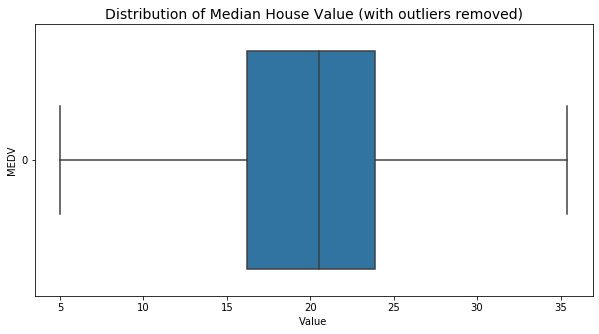

In [23]:
plt.figure(figsize = (10,5)) # Widen figure for better appreciation of shape
sns.boxplot(data=dfSubset["MEDV"], orient="h")
plt.xlabel('Value')
plt.ylabel('MEDV')
plt.title('Distribution of Median House Value (with outliers removed)', fontsize=14)

Assumption 4 is now resolved.

#### Assumption 5 Resolution

There are different ways of checking for normality, fortunately SciPy incorporates a Shapiro-Wilk test (Docs.scipy.org, 2019a) for normality.

In [24]:
ss.shapiro(dfSubset["MEDV"])

(0.9889508485794067, 0.001468385336920619)

The p-value is approx. 0.0015 - this is unfortunately not quite good enough to presume normality as a p-value of 0.05 is generally the lower bound for significance. However, this may not be an issue - a sufficiently large sample size (N>50) means we can ignore this assumption (Bartlett, 2019)!

#### Assumption 6 Resolution

The final assumption requires a test of variance. Firstly we can split the subset DataFrame using the CHAS value as we did above for the original DataFrame.

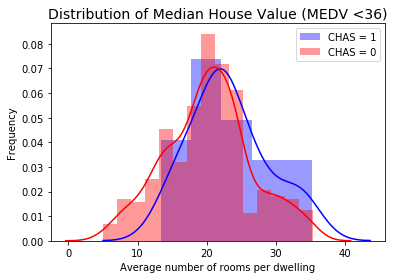

In [25]:
# Extract sub-subsets of the subset dataframe for houses on the Charles River (rys) vs houses not on it (rns)
rys = dfSubset.loc[dfSubset['CHAS'] == 1]
rns = dfSubset.loc[dfSubset['CHAS'] == 0]

# Overlay a distplot for each on the same plot for comparison
sns.distplot(rys['MEDV'], color='b', label = "CHAS = 1")
sns.distplot(rns['MEDV'], color='r', label = "CHAS = 0")

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value (MEDV <36)', fontsize=14)
plt.legend()

SciPy can implement the Levene test (Docs.scipy.org, 2019b) to check homogeneity of variance:

In [26]:
ss.levene(ry['MEDV'], rn['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

Our p value unfortunately indicates that the null hypothesis (that homogeneity of variances exists) is rejected. This does not mean that we cannot carry out out a t-test - it just means that we have to carry out a specific type, called a Welch's t-test (Statistics How To, 2019).

#### T-Test Implementation

The null hypothesis here is that the means are equal. Therefore if there is no significant difference between the means, the t-statistic should be close to 0.

First we need MEDV split into two separate sets - one where CHAS=0 and one where CHAS=1. This has already been carried out to generate the histograms above:
* rns = DataFrame containing only data on houses not along the Charles River (subset where MEDV < 36)
* rys = DataFrame containing only data on houses along the Charles River (subset where MEDV < 36)

We can now finally use SciPy's t-test function.

In [27]:
# equal_var=False to force use of Welch's t-test
ss.ttest_ind(rns['MEDV'], rys['MEDV'], equal_var=False)

Ttest_indResult(statistic=-2.606848398069803, pvalue=0.013854478784092262)

Results:
* t-Statistic: -2.607
* p-value: 0.014

#### p-value
We generally accept a p-value of 0.05 as being the lower bound of whether a relationship is significant or not. Our calculated p-value is somewhat lower than this, we can therefore conclude that there is a significant difference between the means - in other words we reject the null hypothesis and can state that there is a significant difference in median house prices between those on the Charles River and those not on it.

#### Comparison

In order to satisfy curiosity, we can apply the same test to the original dataset (ignoring the required assumptions above):

In [28]:
ss.ttest_ind(rn['MEDV'], ry['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

This p-value is even lower than the one above! Now we can be certain that the null hypothesis should be rejected.

### Conclusions

We can conclude that the difference in the means is statistically significant. However we should caveat this - earlier we noted that an issue with the MEDV values - the distribution of the values indicate that the value above 50 have been truncated for some reason, this would certainly have an effect on the means. We dealt with this by removing outliers, but use of the full dataset would of course be preferable.

## Predict

We will now use the Keras package to create a neural network to predict the median house price based on the datasets other variables.

### Choosing Correlated Variables

Firstly we can generate a correlation plot using NumPy and Seaborn (Seaborn.pydata.org, 2019) to check which variables correlate with each other.

Text(0.5, 1, 'Heatmap of Correlations between Variables')

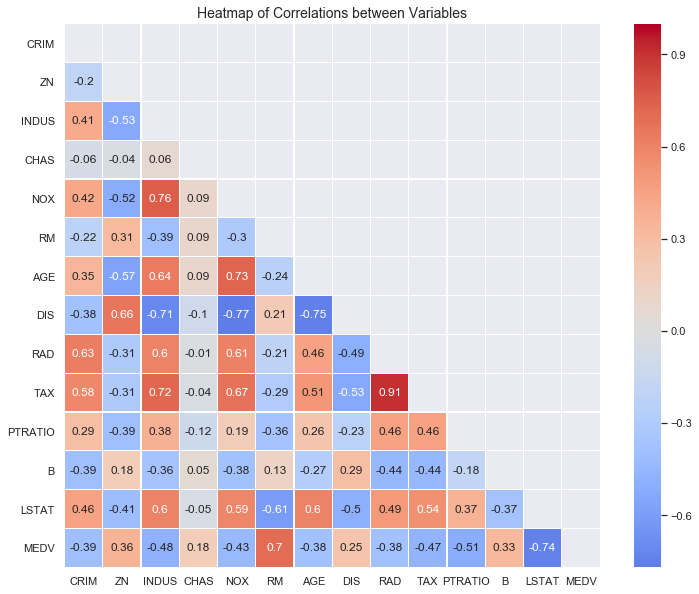

In [29]:
# Seaborn heatmap
sns.set(style='dark')

# Mask upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12,10))
sns.heatmap(df.corr().round(2), annot=True, mask=mask, cmap='coolwarm', center=0, linewidths=0.2)

plt.title('Heatmap of Correlations between Variables', fontsize=14)

We are of course mostly interested in which correlate most strongly (either positively or negatively) with MEDV. Lets take the top 6:
* INDUS: -0.48
* NOX: -0.43
* RM: 0.7
* TAX: -0.47
* PTRATIO: -0.51
* LSTAT: -0.74
    
We can use these as inputs for the model by creating a new DataFrame using only the 6 required columns.

In [30]:
inputs = dfSubset[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
inputs.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,11.519957,0.557831,6.165803,416.181818,18.658009,13.418983
std,6.768981,0.117763,0.569855,169.000756,2.034563,6.979870
min,0.740000,0.385000,3.561000,187.000000,12.600000,1.980000
25%,5.860000,0.453000,5.872500,284.250000,17.450000,7.835000
50%,9.900000,0.538000,6.157500,341.000000,19.100000,12.300000
75%,18.100000,0.624000,6.486500,666.000000,20.200000,17.277500
max,27.740000,0.871000,8.780000,711.000000,22.000000,37.970000


We must also indicate the outputs:

In [31]:
outputs = dfSubset['MEDV']

### Split Dataset

We need to split the dataset into a training dataset and a testing dataset. The training data will be used for the model build, whereas the testing dataset will be used for validation. Scikit-learn includes a very convenient function for this.

In [32]:
import sklearn.model_selection as mod
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

Lets have a look at our inputs:

In [33]:
print(inputs_train.describe())
print(inputs_test.describe())

            INDUS         NOX          RM         TAX     PTRATIO       LSTAT
count  369.000000  369.000000  369.000000  369.000000  369.000000  369.000000
mean    11.505881    0.557679    6.158648  416.476965   18.684011   13.486070
std      6.683216    0.118156    0.571535  169.225394    2.021969    7.147681
min      0.740000    0.385000    3.561000  187.000000   12.600000    1.980000
25%      5.860000    0.453000    5.876000  285.000000   17.600000    7.790000
50%      9.900000    0.538000    6.162000  345.000000   19.200000   12.260000
75%     18.100000    0.624000    6.481000  666.000000   20.200000   17.600000
max     27.740000    0.871000    8.780000  711.000000   22.000000   37.970000
           INDUS        NOX         RM         TAX    PTRATIO      LSTAT
count  93.000000  93.000000  93.000000   93.000000  93.000000  93.000000
mean   11.575806   0.558430   6.194194  415.010753  18.554839  13.152796
std     7.136396   0.116827   0.565311  169.014953   2.091729   6.298843
min   

We can also look at the outputs:

In [34]:
print(outputs_train.describe())
print(outputs_test.describe())

count    369.000000
mean      20.425203
std        6.377716
min        5.000000
25%       16.100000
50%       20.600000
75%       24.000000
max       35.400000
Name: MEDV, dtype: float64
count    93.000000
mean     20.546237
std       6.079519
min       7.200000
25%      17.000000
50%      20.200000
75%      23.300000
max      34.900000
Name: MEDV, dtype: float64


### Build Neural Network

Once we have the data correctly prepared and all required packages imported, we can build the neural network. In order to analyses the effects on accuracy and performance, we can build a series of increasingly more complex networks - lets make three attempts.

#### Preprocessing

Preprocessing can help models to run more accurately and effectively by preparing the data into a more suitable form (Scikit-learn.org, 2019). Scaling (Benalexkeen.com, 2019) is one such useful technique - it both normalises (transforms all values to between 0 and 1) and standardises (centres the mean at 0) all values - this helps to ensure that larger variable values don't overwhelm smaller ones in the neural network.

##### Scaling

In [35]:
from sklearn import preprocessing
# Use the PowerTransformer scaler to increase normality
scaler = preprocessing.PowerTransformer()

In [36]:
inputs_train_scaled = pd.DataFrame(scaler.fit_transform(inputs_train), columns=inputs.columns)

In [37]:
inputs_train_scaled.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02
mean,-1.468262e-16,-6.146845e-16,-5.193640e-16,5.735099e-15,-2.166289e-17,-1.274199e-15
std,1.001358e+00,1.001358e+00,1.001358e+00,1.001358e+00,1.001358e+00,1.001358e+00
min,-2.098507e+00,-1.883219e+00,-3.834809e+00,-2.131081e+00,-2.037170e+00,-2.753549e+00
25%,-7.785616e-01,-9.248844e-01,-5.311901e-01,-7.382143e-01,-7.433726e-01,-7.729449e-01
50%,-9.056830e-02,2.620554e-03,-3.322763e-02,-1.941574e-01,8.860741e-02,3.893209e-02
75%,9.825655e-01,7.172658e-01,5.453911e-01,1.336767e+00,7.600339e-01,7.331621e-01
max,1.973275e+00,2.000716e+00,5.436218e+00,1.463920e+00,2.330959e+00,2.336352e+00


In [38]:
inputs_test_scaled = pd.DataFrame(scaler.fit_transform(inputs_test), columns=inputs.columns)

In [39]:
inputs_test_scaled.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01
mean,-1.260566e-16,-3.452361e-15,3.664930e-16,4.480287e-15,8.356517e-17,-1.742931e-16
std,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00
min,-1.944797e+00,-1.828616e+00,-3.309438e+00,-2.145833e+00,-1.956638e+00,-1.939600e+00
25%,-8.649818e-01,-1.012469e+00,-6.009353e-01,-7.506509e-01,-9.519150e-01,-6.909516e-01
50%,-3.078239e-02,4.544040e-02,-1.309781e-01,-3.111777e-01,7.969647e-02,7.339527e-02
75%,9.529156e-01,7.194350e-01,5.505292e-01,1.351863e+00,8.397071e-01,6.773982e-01
max,1.784421e+00,2.035273e+00,2.174904e+00,1.478495e+00,1.694388e+00,2.115264e+00


#### Keras

The first step in building the models will be to import a number of modules from Keras. Running this, we well receive a message stating that Keras is "Using TensorFlow backend" - Keras sits on top of another, more low level, package called TensorFlow.

In [40]:
from keras.models import Sequential # Create sequential model
from keras.layers import Dense # Add dense layers
from keras.callbacks import EarlyStopping # Allow early stopping of fit process

Using TensorFlow backend.


There are many different ways to build a neural network, the accuracy will depend on the approach we take. Once compiled, the model will be "fitted" to an input dataset iteratively. The iterative process consists of two elements (Brownlee, 2019a):
* Epochs: The number of times the learning algorithm works through the dataset
* Batches: The number of samples processed before the model is updated

It is difficult to estimate at this point how many epochs are required, therefore we can implement an early stopping function (Brownlee, 2019b) to stop this once certain parameters are reached.

In [41]:
earlystop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)

##### Defining Helper Functions

It will be useful to create some helper functions now as some of the following work will be repetitive.

In [42]:
# Function that carries out the Keras evaluate() function and prints to a specified format
def evaluator(evalN, modelN):
    evalN = modelN.evaluate(inputs_test_scaled, outputs_test, verbose=0) # Use Keras evaluate on the input row
    print('This model evaluates as:')
    print('* Loss:', evalN[0])
    print('* MAE:', evalN[1])
    print('* Accuracy:', evalN[2])

In [43]:
# Function that carries out the Keras predict() function and prints to a specified format
def predictor(inpRows, predN, modelN):
    print('This model predicts as:')
    for i in inpRows: # Run for each element in the inpRows array
        actVal = outputs_test[i:i+i].iloc[0] # Extract the target value
        predN = modelN.predict(inputs_test_scaled.as_matrix()[i:i+1]) # Use Keras predict on the input row
        predVal = predN[0][0] # Extract the prediction from the array returned by Keras predict function
        diffVal = abs(actVal - predVal) # Calculate the absolute difference between target and predicted value
        print(f"* Target value: {actVal:4.2f} | Predicted Value: {predVal:4.2f} | Absolute Difference: {diffVal:3.2f}") # f-string to output formatted numbers

#### Model Parameters

We need to carefully select our model parameters - these will have a big impact on how the models run:
* Activation: The activation function maps inputs to outputs in a non-linear, complex manner. ReLU (Rectified Linear Units) is preferred (Medium, 2019a).
* Loss: Simply put, the loss function in the value that the model attempts to minimise. It is normal to start with Mean Squared Error (MSE) (Brownlee, 2019c).
* Optimizer: This is an algorithm that helps to minimise the loss function (Medium, 2019b). We will try the ADAM (Adaptive Moment Estimation) algorithm due to its speed and efficiency.

#### First Attempt

This will be a three layer neural network with densities of 32, 16 and 1.

##### Construct Model

In [44]:
model1 = Sequential() 

model1.add(Dense(units=32, activation='relu', input_dim=6))
model1.add(Dense(units=16, activation='relu'))
model1.add(Dense(units=1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


##### Training

Now we can fit the model and store it in a "history" object. We will set its number of epochs at 500 and allow it to call the "earlystop" function. We will also allow it split the input data into a training set and a validation set - this is distinct from the testing set that will be used to evaluate the data later.

In [45]:
history1 = model1.fit(inputs_train_scaled, outputs_train, epochs=500, validation_split=0.1, callbacks=[earlystop]) # Use 10% of the data for validation

Instructions for updating:
Use tf.cast instead.
Train on 332 samples, validate on 37 samples
Epoch 1/500
332/332 [==============================] - 0s 329us/step - loss: 435.9515 - mae: 19.9321 - acc: 0.0000e+00 - val_loss: 381.1301 - val_mae: 18.5341 - val_acc: 0.0000e+00
Epoch 2/500
332/332 [==============================] - 0s 0us/step - loss: 421.3517 - mae: 19.5833 - acc: 0.0000e+00 - val_loss: 366.1179 - val_mae: 18.1313 - val_acc: 0.0000e+00
Epoch 3/500
332/332 [==============================] - 0s 47us/step - loss: 405.1376 - mae: 19.1748 - acc: 0.0000e+00 - val_loss: 347.8882 - val_mae: 17.6306 - val_acc: 0.0000e+00
Epoch 4/500
332/332 [==============================] - 0s 47us/step - loss: 385.3218 - mae: 18.6628 - acc: 0.0000e+00 - val_loss: 326.3084 - val_mae: 17.0202 - val_acc: 0.0000e+00
Epoch 5/500
332/332 [==============================] - 0s 0us/step - loss: 361.2100 - mae: 18.0267 - acc: 0.0000e+00 - val_loss: 301.1219 - val_mae: 16.2859 - val_acc: 0.0000e+00
Epoch 6/

Our basic, three layer model run with the data as-is didn't perform particularly well, although it was converging towards a solution. Normalising the data definitely made a significant improvement. We can now move on to developing the structure of the model itself to improve the accuracy.

#### Second Attempt - Widen

We will develop the model more and widen it now by doubling the number of units in each hidden layer.

##### Construct Model

In [46]:
model2 = Sequential() 

model2.add(Dense(units=64, activation='relu', input_dim=6))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1))

model2.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


##### Training

In [47]:
history2 = model2.fit(inputs_train_scaled, outputs_train, epochs=500, validation_split=0.1, callbacks=[earlystop])

Train on 332 samples, validate on 37 samples
Epoch 1/500
332/332 [==============================] - 0s 380us/step - loss: 451.9246 - mae: 20.2872 - acc: 0.0000e+00 - val_loss: 393.9230 - val_mae: 18.8387 - val_acc: 0.0000e+00
Epoch 2/500
332/332 [==============================] - 0s 47us/step - loss: 431.6230 - mae: 19.7783 - acc: 0.0000e+00 - val_loss: 373.6360 - val_mae: 18.2755 - val_acc: 0.0000e+00
Epoch 3/500
332/332 [==============================] - 0s 47us/step - loss: 408.8524 - mae: 19.1919 - acc: 0.0000e+00 - val_loss: 349.5654 - val_mae: 17.5937 - val_acc: 0.0000e+00
Epoch 4/500
332/332 [==============================] - 0s 47us/step - loss: 380.5089 - mae: 18.4477 - acc: 0.0000e+00 - val_loss: 319.0801 - val_mae: 16.7055 - val_acc: 0.0000e+00
Epoch 5/500
332/332 [==============================] - 0s 47us/step - loss: 343.2567 - mae: 17.4365 - acc: 0.0000e+00 - val_loss: 280.1780 - val_mae: 15.5101 - val_acc: 0.0270
Epoch 6/500
332/332 [==============================] - 0s 

#### Third Attempt - Deepen

We will develop the second attempt model and deepen it now by adding another 2 hidden layers.

##### Construct Model

In [48]:
model3 = Sequential() 

model3.add(Dense(units=256, activation='relu', input_dim=6))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=32, activation='relu'))
model3.add(Dense(units=1))

model3.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 45,057
Trainable params: 45,057
Non-trainable params: 0
_________________________________________________________________


##### Training

In [49]:
history3 = model3.fit(inputs_train_scaled, outputs_train, epochs=500, validation_split=0.1, callbacks=[earlystop])

Train on 332 samples, validate on 37 samples
Epoch 1/500
332/332 [==============================] - 0s 565us/step - loss: 433.7089 - mae: 19.8571 - acc: 0.0000e+00 - val_loss: 340.6261 - val_mae: 17.4074 - val_acc: 0.0000e+00
Epoch 2/500
332/332 [==============================] - 0s 0us/step - loss: 304.1363 - mae: 16.3669 - acc: 0.0000e+00 - val_loss: 153.5784 - val_mae: 11.1170 - val_acc: 0.0000e+00
Epoch 3/500
332/332 [==============================] - 0s 47us/step - loss: 96.3029 - mae: 8.3593 - acc: 0.0030 - val_loss: 62.8826 - val_mae: 6.1176 - val_acc: 0.0270
Epoch 4/500
332/332 [==============================] - 0s 47us/step - loss: 59.9435 - mae: 6.2881 - acc: 0.0030 - val_loss: 31.4996 - val_mae: 4.5639 - val_acc: 0.0000e+00
Epoch 5/500
332/332 [==============================] - 0s 47us/step - loss: 39.8899 - mae: 5.0223 - acc: 0.0060 - val_loss: 26.6128 - val_mae: 4.1919 - val_acc: 0.0000e+00
Epoch 6/500
332/332 [==============================] - 0s 47us/step - loss: 31.4624

##### Evaluate

We should now evaluate the performance of our neural networks. We can call the evaluate helper function on each history object to output its Loss, Mean Average Error and Accuracy.

In [50]:
evaluate1 = [] # Create an empty output list to allow function to run
evaluator(evaluate1, model1)

This model evaluates as:
* Loss: 8.461560054491924
* MAE: 2.070439100265503
* Accuracy: 0.032258063554763794


In [51]:
evaluate2 = [] # Create an empty output list to allow function to run
evaluator(evaluate2, model2)

This model evaluates as:
* Loss: 7.916460006467758
* MAE: 2.0501902103424072
* Accuracy: 0.04301075264811516


In [52]:
evaluate3 = [] # Create an empty output list to allow function to run
evaluator(evaluate3, model3)

This model evaluates as:
* Loss: 8.470207040027905
* MAE: 2.1227850914001465
* Accuracy: 0.032258063554763794


It is interesting to note that the loss does not necessarily improve as the model is widened or deepened - the three losses evaluated are quite similar, with the chosen seed value they are decreasing in loss but a different seed value can show an increase!
Overall, the Mean Squared Error is between 7.8 and 8.5, with Mean Average Error of slightly above 2.0 and accuracy < 0.05.

##### Convergence

The evaluate function does not actually tell us how quickly our Keras models are converging. We can call on the History objects to assess this - lets graph them together and see.

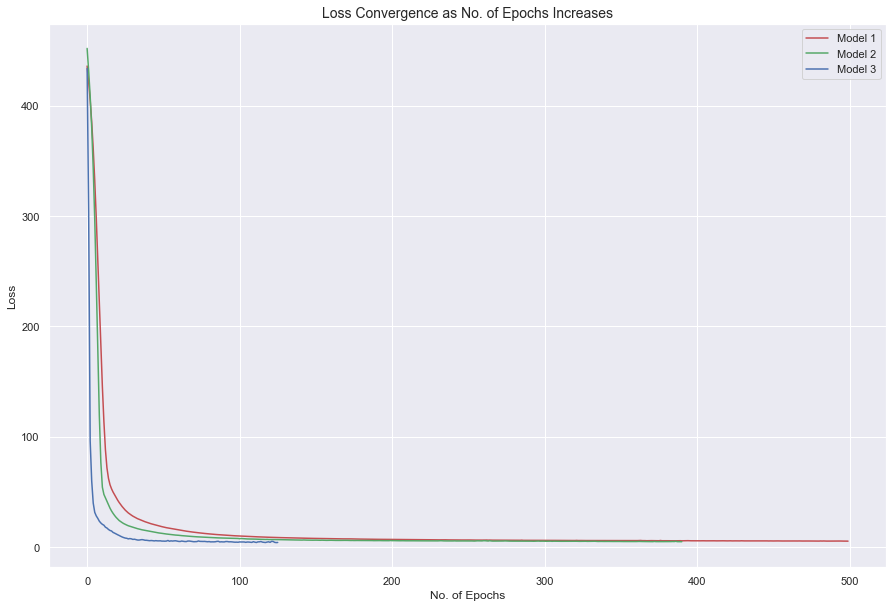

In [53]:
plt.figure(figsize=(15,10))
plt.plot(history1.history['loss'], color='r', label = "Model 1")
plt.plot(history2.history['loss'], color='g', label = "Model 2")
plt.plot(history3.history['loss'], color='b', label = "Model 3")
plt.grid() # Use gridlines
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Convergence as No. of Epochs Increases', fontsize=14)
plt.legend()

All three models converge towards a similar loss however the number of epochs required varies. The second (wider) model converges slightly faster than the first (basic) - but the third (deeper) model converges on a solution significantly faster - this is an important consideration.

##### Predictions

We can now use the predictor helper function to make some predictions. We'll generate an array of random integers to select 10 rows at random from the test inputs that we have.

In [54]:
inpRows = np.random.randint(0, inputs_test_scaled.shape[0]-1, size=10) # Select 10 random integers between 0 and the max row number of the inputs_test_scaled DataFrame

Now we can call this function on each model in turn. As the same input rows are selected each time, the target values will be the same.

In [55]:
predict1 = [] # Create an empty output list to allow function to run
predictor(inpRows, predict1, model1)

This model predicts as:
* Target value: 20.10 | Predicted Value: 20.56 | Absolute Difference: 0.46
* Target value: 17.20 | Predicted Value: 12.44 | Absolute Difference: 4.76
* Target value: 15.40 | Predicted Value: 14.09 | Absolute Difference: 1.31
* Target value: 22.90 | Predicted Value: 20.93 | Absolute Difference: 1.97
* Target value: 18.40 | Predicted Value: 18.67 | Absolute Difference: 0.27
* Target value: 15.70 | Predicted Value: 18.24 | Absolute Difference: 2.54
* Target value: 15.00 | Predicted Value: 19.66 | Absolute Difference: 4.66
* Target value: 25.00 | Predicted Value: 21.98 | Absolute Difference: 3.02
* Target value: 15.40 | Predicted Value: 14.09 | Absolute Difference: 1.31
* Target value: 19.50 | Predicted Value: 17.38 | Absolute Difference: 2.12


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [56]:
predict2 = [] # Create an empty output list to allow function to run
predictor(inpRows, predict2, model2)

This model predicts as:
* Target value: 20.10 | Predicted Value: 19.94 | Absolute Difference: 0.16
* Target value: 17.20 | Predicted Value: 14.07 | Absolute Difference: 3.13
* Target value: 15.40 | Predicted Value: 14.25 | Absolute Difference: 1.15
* Target value: 22.90 | Predicted Value: 21.38 | Absolute Difference: 1.52
* Target value: 18.40 | Predicted Value: 18.62 | Absolute Difference: 0.22
* Target value: 15.70 | Predicted Value: 18.86 | Absolute Difference: 3.16
* Target value: 15.00 | Predicted Value: 19.28 | Absolute Difference: 4.28
* Target value: 25.00 | Predicted Value: 22.61 | Absolute Difference: 2.39
* Target value: 15.40 | Predicted Value: 14.25 | Absolute Difference: 1.15
* Target value: 19.50 | Predicted Value: 17.92 | Absolute Difference: 1.58


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [57]:
predict3 = [] # Create an empty output list to allow function to run
predictor(inpRows, predict3, model3)

This model predicts as:
* Target value: 20.10 | Predicted Value: 19.27 | Absolute Difference: 0.83
* Target value: 17.20 | Predicted Value: 13.36 | Absolute Difference: 3.84
* Target value: 15.40 | Predicted Value: 14.53 | Absolute Difference: 0.87
* Target value: 22.90 | Predicted Value: 21.16 | Absolute Difference: 1.74
* Target value: 18.40 | Predicted Value: 19.29 | Absolute Difference: 0.89
* Target value: 15.70 | Predicted Value: 17.41 | Absolute Difference: 1.71
* Target value: 15.00 | Predicted Value: 19.78 | Absolute Difference: 4.78
* Target value: 25.00 | Predicted Value: 22.48 | Absolute Difference: 2.52
* Target value: 15.40 | Predicted Value: 14.53 | Absolute Difference: 0.87
* Target value: 19.50 | Predicted Value: 18.25 | Absolute Difference: 1.25


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


##### Conclusions

Machine Learning is complex and depends on a multitude of parameters, characteristics of the input data and even randomness (Brownlee, 2019d). Once we were confident that our input data was fully prepared and preprocessed, we created a series of models of increasing complexity in order to assess the effect of increasing numbers of neurons per layer as well as increasing numbers of layers. The more complex models converged to a similar end result as the basic model, although increasing complexity does appear to allow quicker convergence due to a decreased number of epochs required, therefore the most complex model performs best here in terms of efficiency.

It was possible to obtain reasonable accurate (although not perfect) results with all three models - assessment of the predicted values above shows that the three models do generally give good indications of the target values. The limitations in accuracy are partly a result of the input data - although consisting of over 500 samples, it was necessary to exclude some due to conncerns over truncation of certain values and to pass a t-test. The sample size is of course further reduced by setting aside both a testing set of data as well as a validation set for each model - down from the original sample size of 506, the data was actually trained on 336 samples. In an ideal situation, a larger sample size would be available for training.

### References

1. GeeksforGeeks. (2019). Python | Pandas dataframe.keys() - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-keys/ [Accessed 2 Nov. 2019].  

2. Harrison, D. and Rubinfeld, D. (1978). Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management, [online] 5(1), pp.81-102. Available at: https://www.sciencedirect.com/science/article/abs/pii/0095069678900062?via%3Dihub [Accessed 9 Dec. 2019].  

3. Statistics.laerd.com. (2019a). Histograms - Understanding the properties of histograms, what they show, and when and how to use them | Laerd Statistics. [online] Available at: https://statistics.laerd.com/statistical-guides/understanding-histograms.php [Accessed 7 Nov. 2019].  

4. Mathisonian.github.io. (2019). Kernel Density Estimation. [online] Available at: https://mathisonian.github.io/kde/ [Accessed 7 Nov. 2019].  

5. Statistics.laerd.com. (2019b). Independent t-test in SPSS Statistics - Procedure, output and interpretation of the output using a relevant example | Laerd Statistics. [online] Available at. https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php [Accessed 12 Nov. 2019].  

6. Docs.scipy.org. (2019a). scipy.stats.shapiro — SciPy v1.3.3 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html [Accessed 9 Dec. 2019].  

7. Bartlett, J. (2019). The t-test and robustness to non-normality – The Stats Geek. [online] Thestatsgeek.com. Available at: https://thestatsgeek.com/2013/09/28/the-t-test-and-robustness-to-non-normality/ [Accessed 20 Nov. 2019].  

8. Docs.scipy.org. (2019b). scipy.stats.levene — SciPy v1.3.3 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy-1.3.3/reference/generated/scipy.stats.levene.html [Accessed 10 Dec. 2019].  

9. Statistics How To. (2019). Welch's Test for Unequal Variances - Statistics How To. [online] Available at: https://www.statisticshowto.datasciencecentral.com/welchs-test-for-unequal-variances/ [Accessed 10 Dec. 2019].  

10. Seaborn.pydata.org. (2019). Plotting a diagonal correlation matrix — seaborn 0.9.0 documentation. [online] Available at: https://seaborn.pydata.org/examples/many_pairwise_correlations.html [Accessed 6 Nov. 2019].  

11. Scikit-learn.org. (2019). 6.3. Preprocessing data — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/preprocessing.html [Accessed 29 Nov. 2019].  

12. Benalexkeen.com. (2019). Feature Scaling with scikit-learn – Ben Alex Keen. [online] Available at: http://benalexkeen.com/feature-scaling-with-scikit-learn/ [Accessed 29 Nov. 2019].  

13. Brownlee, J. (2019a). Difference Between a Batch and an Epoch in a Neural Network. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/ [Accessed 27 Nov. 2019].  

14. Brownlee, J. (2019b). Use Early Stopping to Halt the Training of Neural Networks At the Right Time. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ [Accessed 29 Nov. 2019].  

15. Medium. (2019a). Activation functions and it’s types-Which is better?. [online] Available at: https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f [Accessed 29 Nov. 2019].  

16. Brownlee, J. (2019c). How to Choose Loss Functions When Training Deep Learning Neural Networks. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ [Accessed 21 Nov. 2019].  

17. Medium. (2019b). Types of Optimization Algorithms used in Neural Networks and Ways to Optimize Gradient Descent. [online] Available at: https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f [Accessed 28 Nov. 2019].  

18. Brownlee, J. (2019d). How To Improve Deep Learning Performance. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/improve-deep-learning-performance/ [Accessed 12 Dec. 2019].